In [8]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
object_names =np.array(['0','1','2','3','4','5','6','7','8','9'])

The image represents the number 8


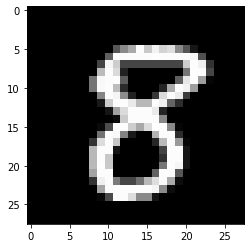

In [15]:
index = 333
print(f"The image represents the number {object_names[train_labels[index]]}")
plt.imshow(train_images[index],cmap='gray')
plt.show()

In [11]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={''}):
    if (logs.get('accuracy')>=.95):
      print("\nTraining stopped as model got required accuracy level of 95 %")
      self.model.stop_training = True

In [12]:
callbacks = MyCallback ()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,callbacks=callbacks)


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.7556 - accuracy: 0.9053
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3565 - accuracy: 0.9354
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3109 - accuracy: 0.9379
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2704 - accuracy: 0.9452
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2643 - accuracy: 0.9479
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.2340 - accuracy: 0.9533
Training stopped as model got required accuracy level of 95 %
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2338 - accuracy: 0.9533


In [13]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.9450


[0.35523557662963867, 0.9449999928474426]